In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [17]:
def ler_resultados(dataset, algoritmo):
    """
    Ler os resultados do experimento. 
    
    Args:
        dataset (string): 'sunspot' ou 'ariline', 'hit', 'aws', 'sp500' ou 'dmt'
        algoritmo (string): 'pso' ou 'cqso'
        
    Retorna:
        dicionário contendo duas chaves: treino e teste, com quatro listas (cenários) cada uma.
        
    """
    dados_dir_treino = [f'resultados/{dataset}_resultados_mse_treino_{dataset}_{algoritmo}_{i}.csv' for i in range(1, 5)]
    dados_dir_teste = [f'resultados/{dataset}_resultados_mse_teste_{dataset}_{algoritmo}_{i}.csv' for i in range(1, 5)]
    
    # treino
    dados = {
        'treino': [],
        'teste': [],
    }
    
    for i in dados_dir_treino:
        
        if algoritmo == 'pso':
            dados_temp = pd.read_csv(i).transpose()[1:]
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
            
        elif algoritmo == 'cqso':
            dados_temp = pd.read_csv(i).transpose()
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
        
        dados['treino'].append(dados_temp)
        
        
        
    # teste
    
    for i in dados_dir_teste:
        
        if algoritmo == 'pso':
            dados_temp = pd.read_csv(i).transpose()[1:]
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
            
        elif algoritmo == 'cqso':
            dados_temp = pd.read_csv(i).transpose()
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
        
        dados['teste'].append(dados_temp)
    
    return dados

## Ler os dados

In [187]:
datasets = ['sunspot', 'airline', 'aws', 'sp500', 'usd']
algoritmos = ['pso', 'cqso']

datasets_dict = dict.fromkeys(datasets)

for data in datasets:
    algoritmos_dict = dict.fromkeys(algoritmos)

    for algo in algoritmos:
        
        algoritmos_dict[algo] = ler_resultados(data, algo)
        
    datasets_dict[data] = algoritmos_dict
        
    
# # sunspot
sunspot_pso = datasets_dict['sunspot']['pso']
sunspot_cqso = datasets_dict['sunspot']['cqso']

# # airline
airline_pso = datasets_dict['airline']['pso']
airline_cqso = datasets_dict['airline']['cqso']

# # aws
aws_pso = datasets_dict['aws']['pso']
aws_cqso = datasets_dict['aws']['cqso']

# # sp500
sp500_pso = datasets_dict['sp500']['pso']
sp500_cqso = datasets_dict['sp500']['cqso']

# usd 
usd_pso = datasets_dict['usd']['pso']
usd_cqso = datasets_dict['usd']['cqso']




In [188]:
# Calcular média e desvio padrão das execuções

def calcular_media(valores):
    
    lista_valores = {
        'treino':[],
        'teste':[],
    }
    
    for conjunto in ['treino', 'teste']:
        
        for i in valores[conjunto]:  
            
            lista_valores[conjunto].append(i.mean(axis = 1))

    return lista_valores

def calcular_desvio(valores):
    
    lista_valores = {
        'treino':[],
        'teste':[],
    }
    
    for conjunto in ['treino', 'teste']:
        
        for i in valores[conjunto]:  
            
            lista_valores[conjunto].append(i.std(axis = 1))

    return lista_valores
    

def dados_df(lista1, lista2):
    
    lista_df = []
    
    for i, j in zip(lista1, lista2):
    
        df_temp = pd.concat([i, j], axis = 1)
        df_temp.columns = ['pso', 'cqso']
        
        lista_df.append(df_temp)
        
    return lista_df

## Calcular média e desvio padrão 

In [189]:
# sunspot
sunspot_media_pso = calcular_media(sunspot_pso)
sunspot_media_cqso = calcular_media(sunspot_cqso)


sunspot_treino_media_1, sunspot_treino_media_2, sunspot_treino_media_3, sunspot_treino_media_4 = dados_df(sunspot_media_pso['treino'], 
                                                                                                         sunspot_media_cqso['treino']) 

sunspot_teste_media_1, sunspot_teste_media_2, sunspot_teste_media_3, sunspot_teste_media_4 = dados_df(sunspot_media_pso['teste'], 
                                                                                                         sunspot_media_cqso['teste']) 

# airline
airline_media_pso = calcular_media(airline_pso)
airline_media_cqso = calcular_media(airline_cqso)

airline_treino_media_1, airline_treino_media_2, airline_treino_media_3, airline_treino_media_4 = dados_df(airline_media_pso['treino'], 
                                                                                                         airline_media_cqso['treino']) 
airline_teste_media_1, airline_teste_media_2, airline_teste_media_3, airline_teste_media_4 = dados_df(airline_media_pso['teste'], 
                                                                                                         airline_media_cqso['teste']) 


# aws
aws_media_pso = calcular_media(aws_pso)
aws_media_cqso = calcular_media(aws_cqso)

aws_treino_media_1, aws_treino_media_2, aws_treino_media_3, aws_treino_media_4 = dados_df(aws_media_pso['treino'],
                                                                                         aws_media_cqso['treino'])


aws_teste_media_1, aws_teste_media_2, aws_teste_media_3, aws_teste_media_4 = dados_df(aws_media_pso['teste'],
                                                                                         aws_media_cqso['teste'])

# sp500
sp500_media_pso = calcular_media(sp500_pso)
sp500_media_cqso = calcular_media(sp500_cqso)

sp500_treino_media_1, sp500_treino_media_2, sp500_treino_media_3, sp500_treino_media_4 = dados_df(sp500_media_pso['treino'],
                                                                                                 sp500_media_cqso['treino'])

sp500_teste_media_1, sp500_teste_media_2, sp500_teste_media_3, sp500_teste_media_4 = dados_df(sp500_media_pso['teste'],
                                                                                                 sp500_media_cqso['teste'])


# usd
usd_media_pso = calcular_media(usd_pso)
usd_media_cqso = calcular_media(usd_cqso)

usd_treino_media_1, usd_treino_media_2, usd_treino_media_3, usd_treino_media_4 = dados_df(usd_media_pso['treino'],
                                                                                                 usd_media_cqso['treino'])

usd_teste_media_1, usd_teste_media_2, usd_teste_media_3, usd_teste_media_4 = dados_df(usd_media_pso['teste'],
                                                                                                 usd_media_cqso['teste'])

## Mostrar gráficos

In [151]:
## função criar gráfico
def plota_graf(df, nome):
    df.plot(figsize = (12, 8))
    plt.xlabel('iteração')
    plt.ylabel('erro')
    plt.savefig(f'{nome}.png')
    plt.show()

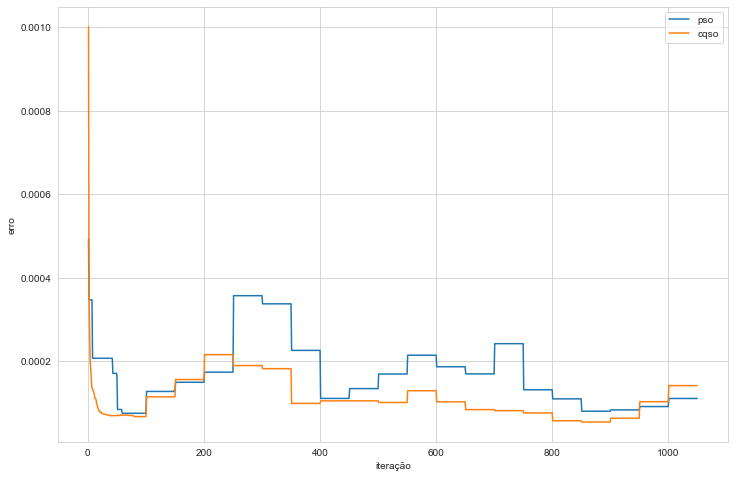

In [129]:
plota_graf(sunspot_treino_media_1, 'sunspot_treino_media_1')

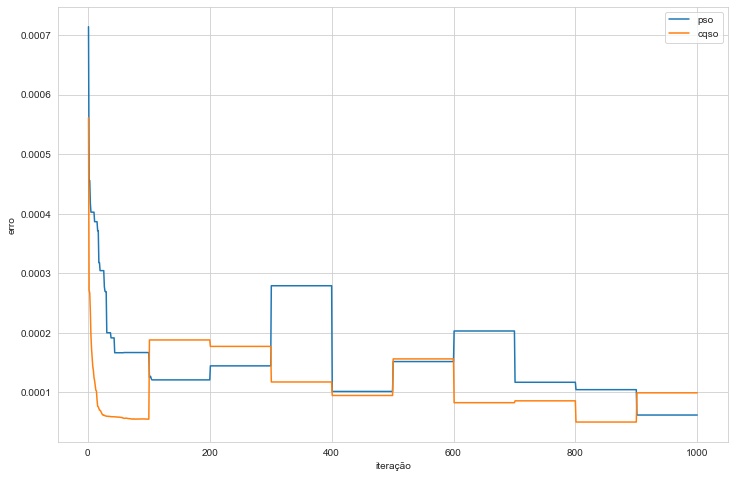

In [130]:
plota_graf(sunspot_treino_media_2, 'sunspot_treino_media_2')

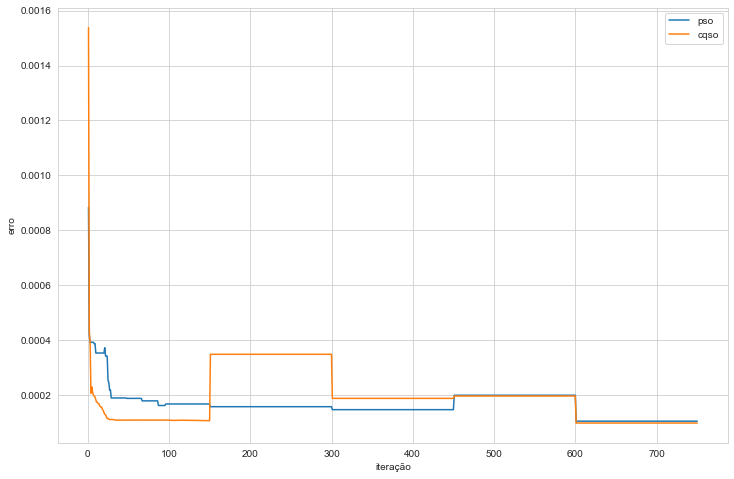

In [131]:
plota_graf(sunspot_treino_media_3, 'sunspot_treino_media_3')

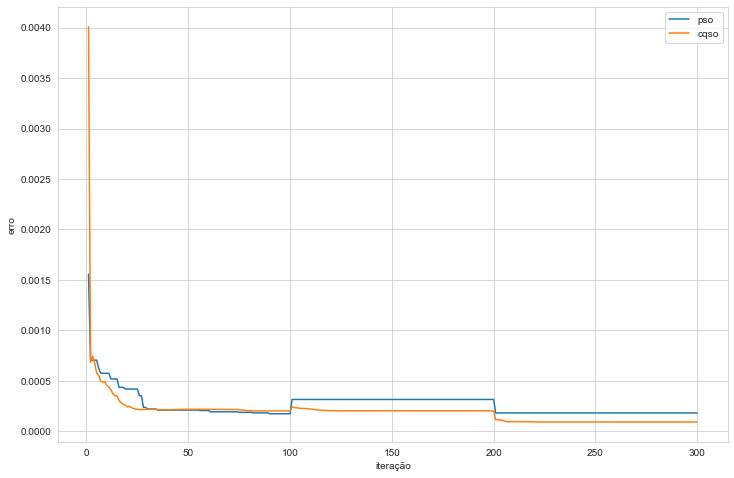

In [132]:
plota_graf(sunspot_treino_media_4, 'sunspot_treino_media_4')

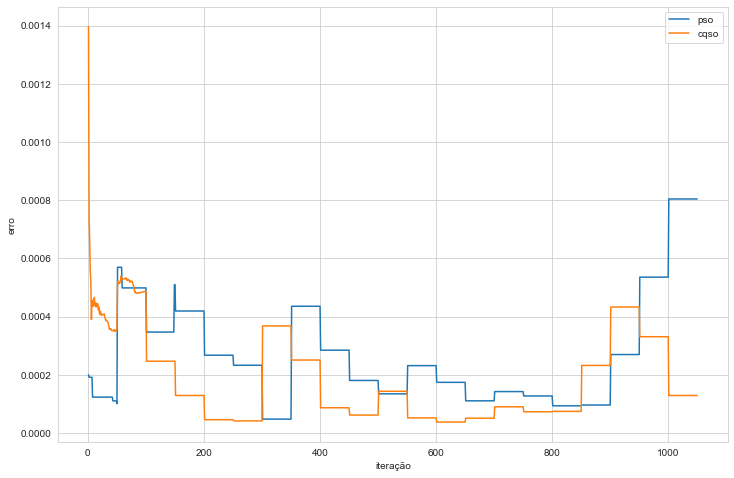

In [133]:
plota_graf(sunspot_teste_media_1, 'sunspot_teste_media_1')

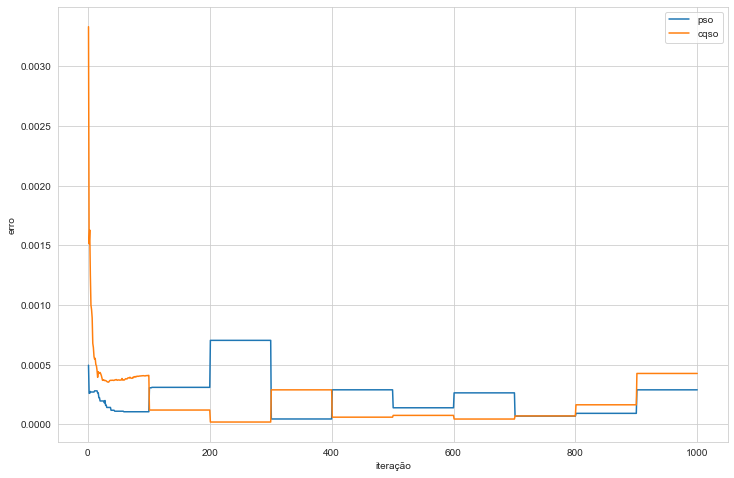

In [134]:
plota_graf(sunspot_teste_media_2, 'sunspot_teste_media_2')

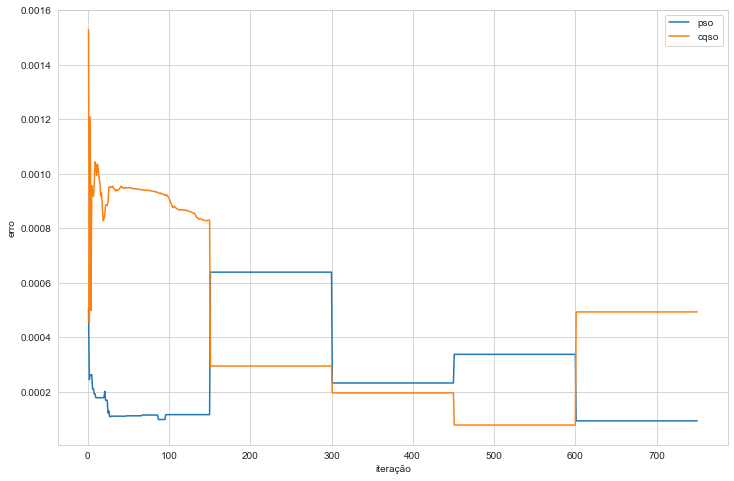

In [135]:
plota_graf(sunspot_teste_media_3, 'sunspot_teste_media_3')

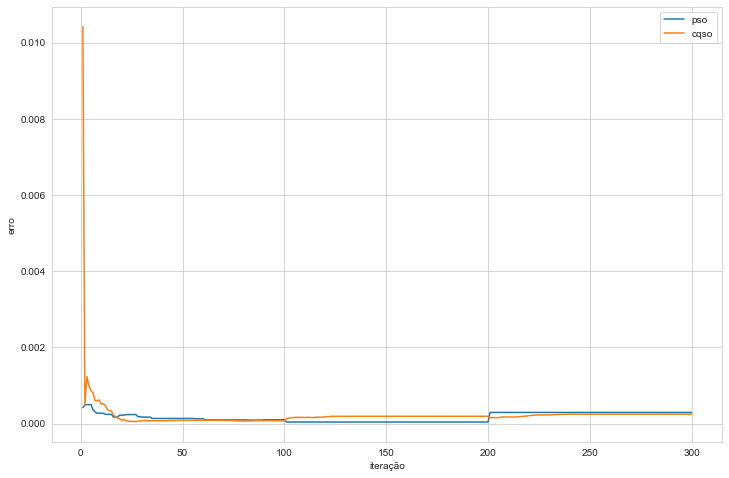

In [136]:
plota_graf(sunspot_teste_media_4, 'sunspot_teste_media_4')

In [197]:
print('Treinamento')
print('\nCenário 1:\n{}'.format(sunspot_treino_media_1.mean()))
print('\nCenário 2:\n{}'.format(sunspot_treino_media_2.mean()))
print('\nCenário 3:\n{}'.format(sunspot_treino_media_3.mean()))
print('\nCenário 4:\n{}'.format(sunspot_treino_media_4.mean()))

Treinamento

Cenário 1:
pso     0.000168
cqso    0.000112
dtype: float64

Cenário 2:
pso     0.000152
cqso    0.000113
dtype: float64

Cenário 3:
pso     0.000164
cqso    0.000193
dtype: float64

Cenário 4:
pso     0.000264
cqso    0.000199
dtype: float64


In [106]:
print('Teste')
print('\nCenário 1:\n{}'.format(sunspot_teste_media_1.mean()))
print('\nCenário 2:\n{}'.format(sunspot_teste_media_2.mean()))
print('\nCenário 3:\n{}'.format(sunspot_teste_media_3.mean()))
print('\nCenário 4:\n{}'.format(sunspot_teste_media_4.mean()))

Teste

Cenário 1:
pso     0.000266
cqso    0.000182
dtype: float64

Cenário 2:
pso     0.000236
cqso    0.000176
dtype: float64

Cenário 3:
pso     0.000287
cqso    0.000395
dtype: float64

Cenário 4:
pso     0.000166
cqso    0.000226
dtype: float64


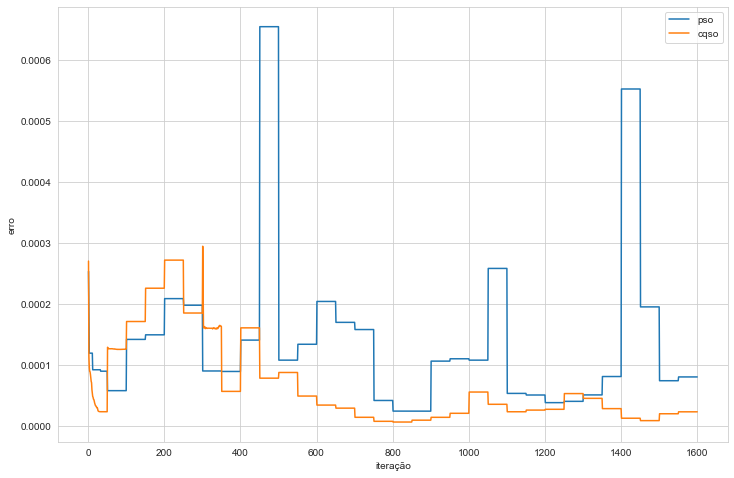

In [155]:
plota_graf(sp500_treino_media_1, 'sp500_treino_media_1')

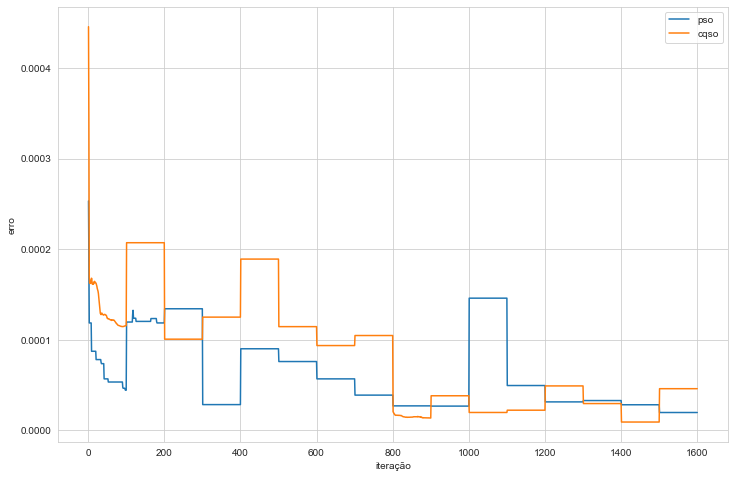

In [156]:
plota_graf(sp500_treino_media_2, 'sp500_treino_media_2')

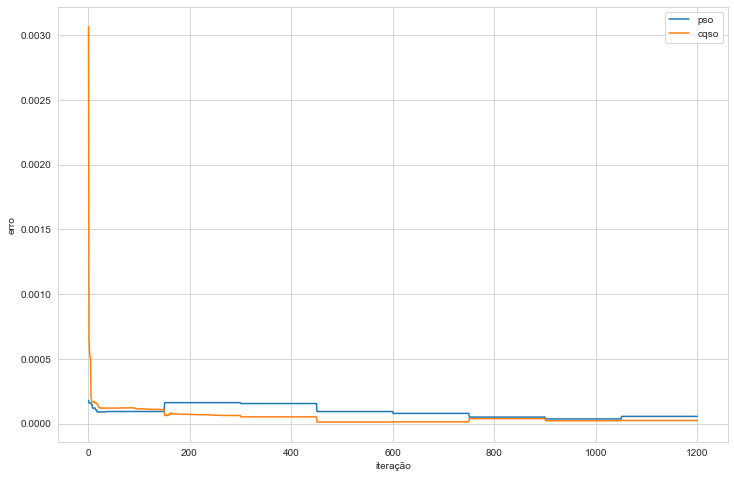

In [157]:
plota_graf(sp500_treino_media_3, 'sp500_treino_media_3')

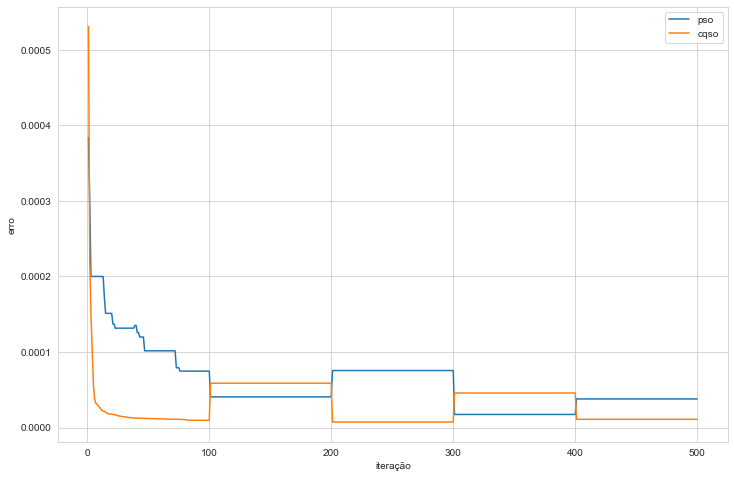

In [158]:
plota_graf(sp500_treino_media_4, 'sp500_treino_media_4')

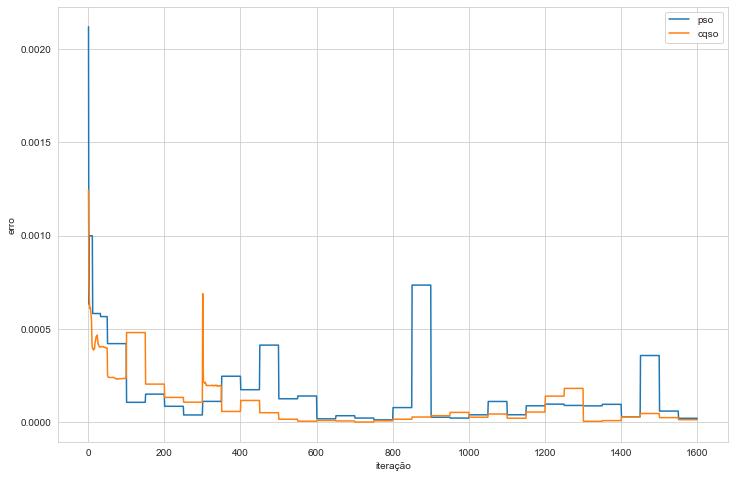

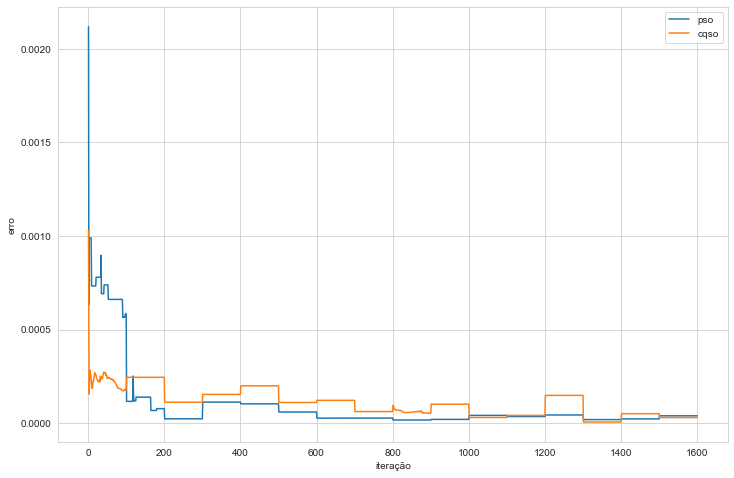

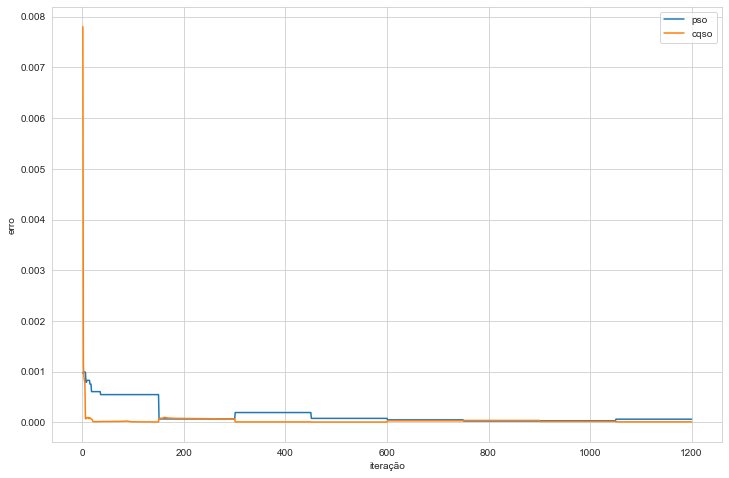

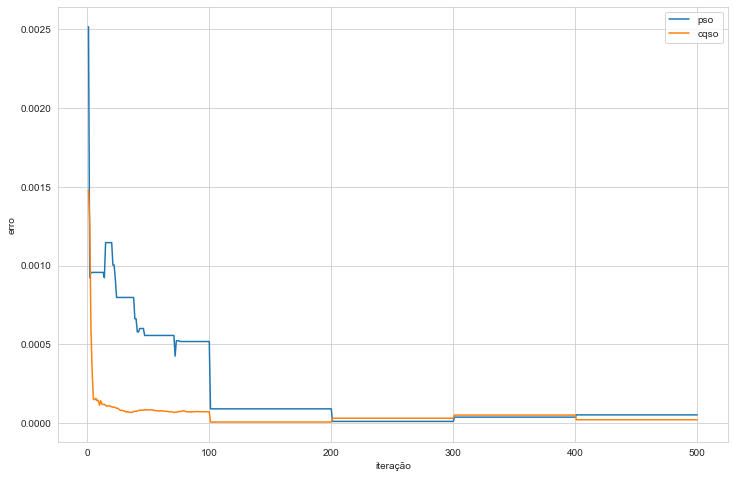

In [154]:
plota_graf(sp500_teste_media_1, 'sp500_teste_media_1')
plota_graf(sp500_teste_media_2, 'sp500_teste_media_2')
plota_graf(sp500_teste_media_3, 'sp500_teste_media_3')
plota_graf(sp500_teste_media_4, 'sp500_teste_media_4')

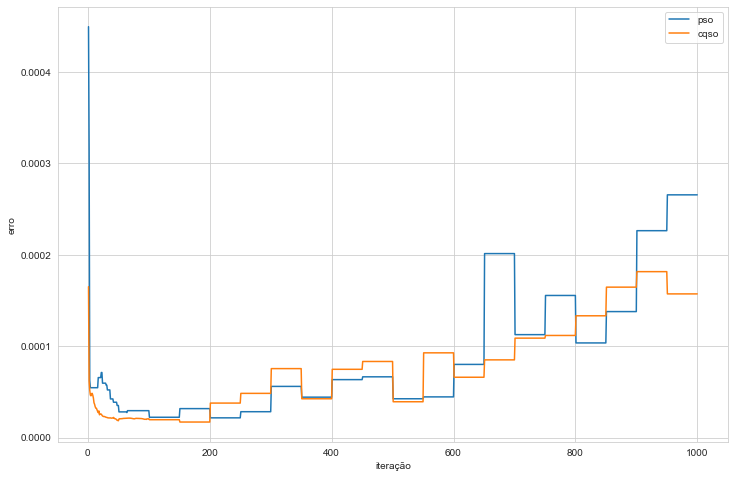

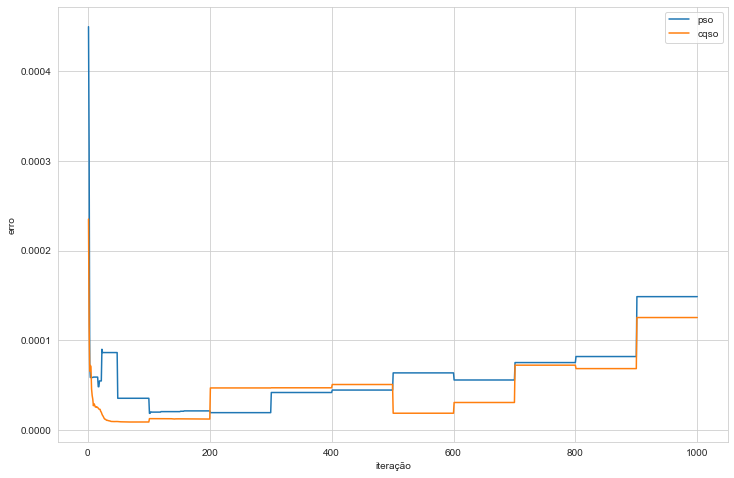

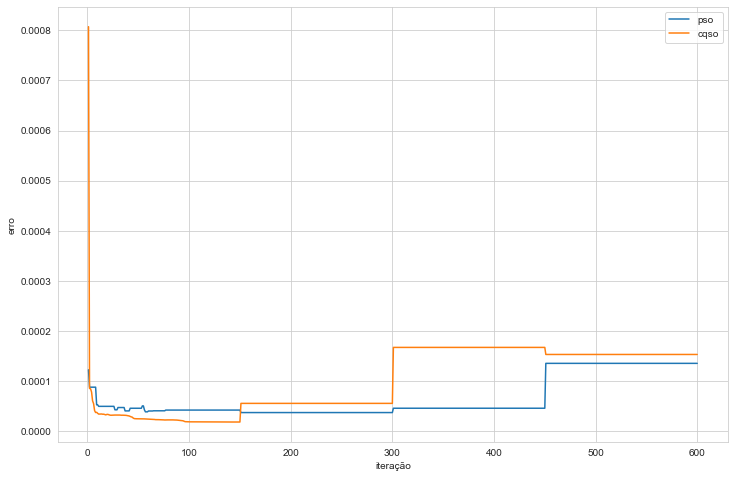

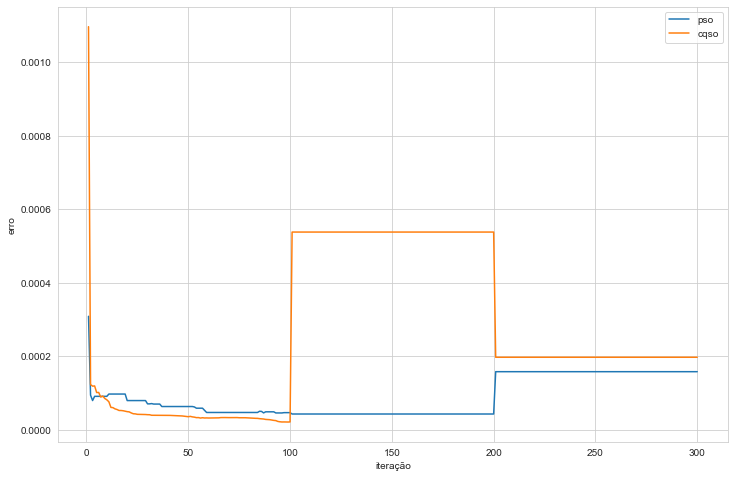

In [159]:
plota_graf(airline_treino_media_1, 'airline_treino_media_1')
plota_graf(airline_treino_media_2, 'airline_treino_media_2')
plota_graf(airline_treino_media_3, 'airline_treino_media_3')
plota_graf(airline_treino_media_4, 'airline_treino_media_4')

Teste Airline IAP


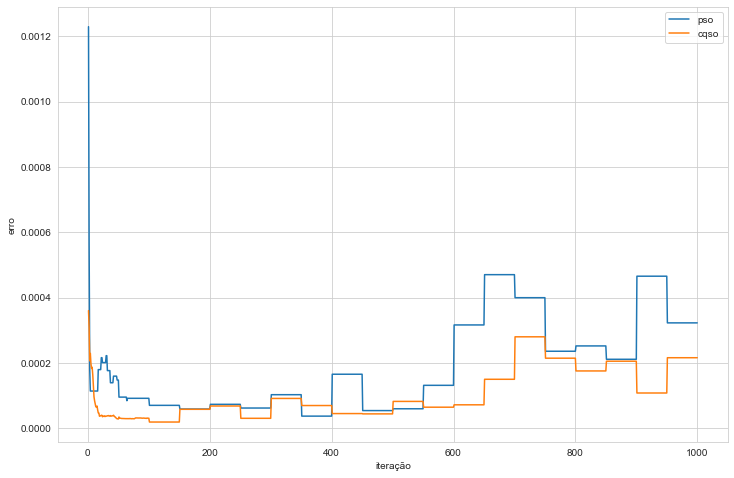

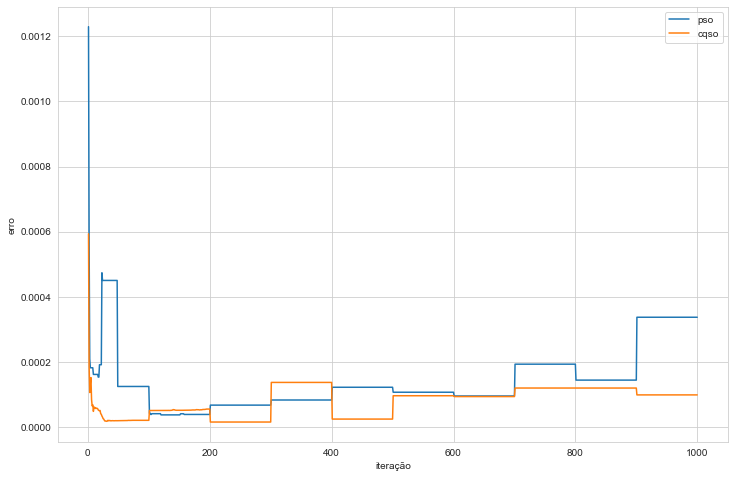

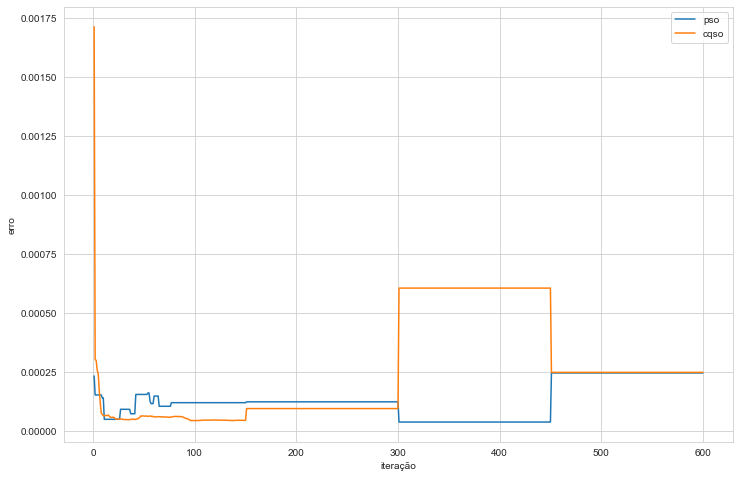

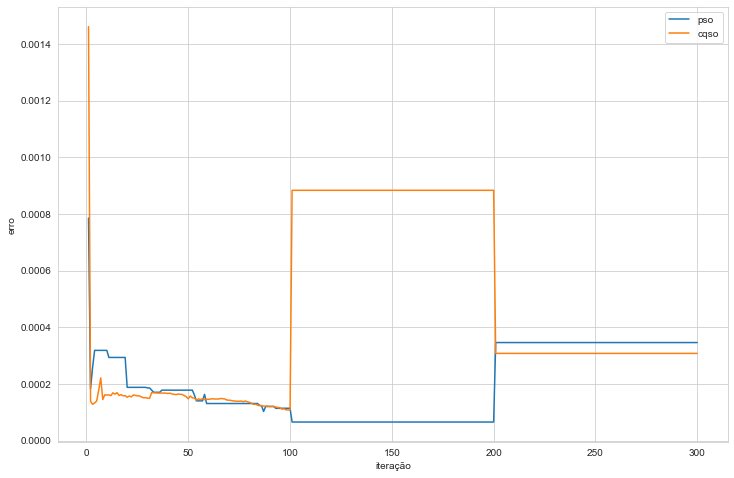

In [193]:
# Teste Airline IAP
print("Teste Airline IAP")
plota_graf(airline_teste_media_1, 'airline_teste_media_1')
plota_graf(airline_teste_media_2, 'airline_teste_media_2')
plota_graf(airline_teste_media_3, 'airline_teste_media_3')
plota_graf(airline_teste_media_4, 'airline_teste_media_4')

Treinamento AWS


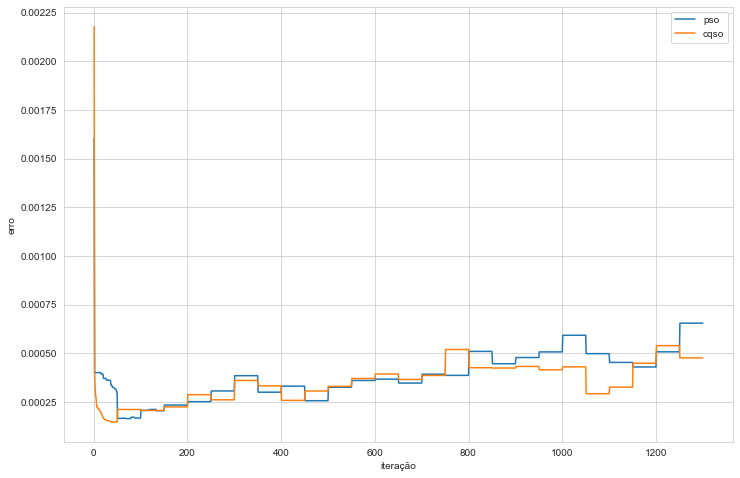

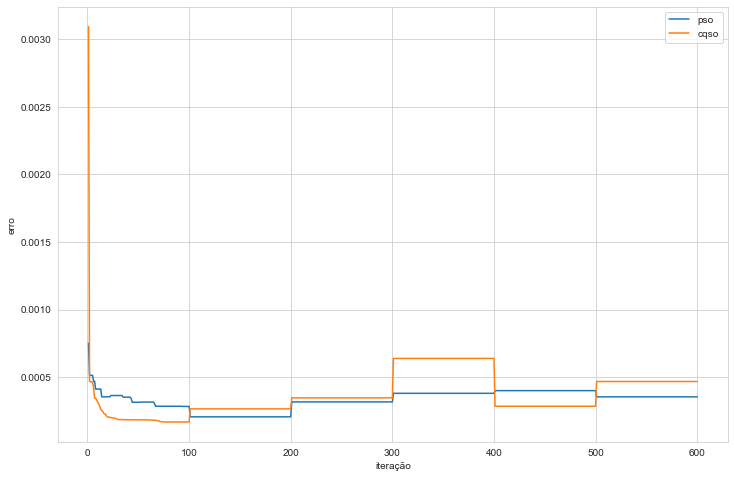

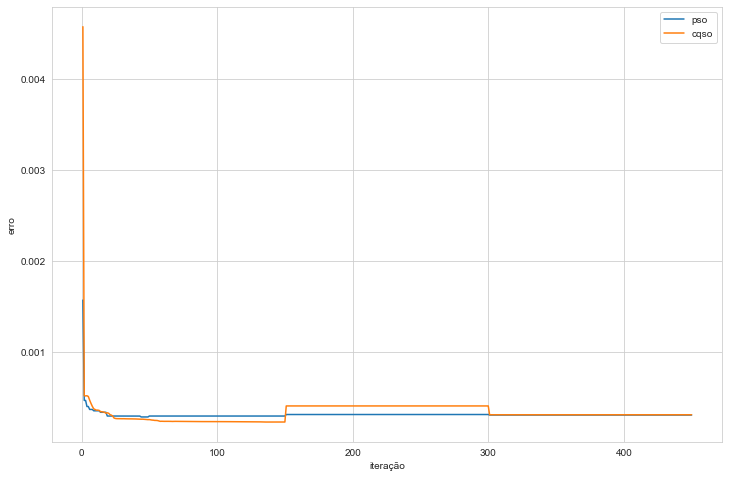

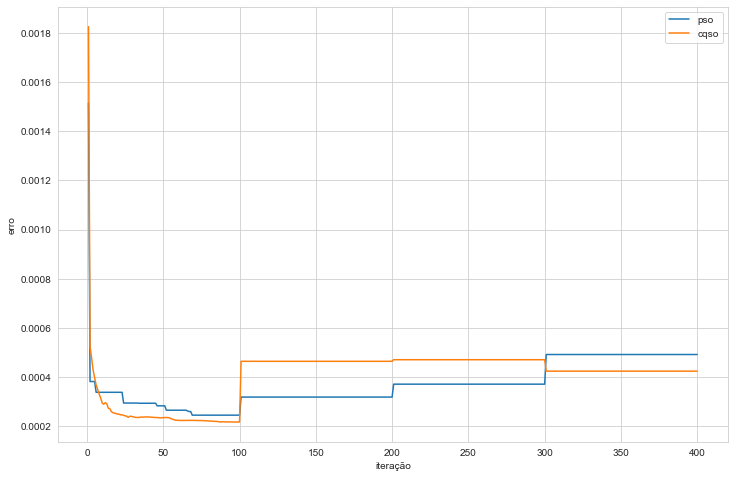

In [192]:
#Treino
print("Treinamento AWS")
plota_graf(aws_treino_media_1, 'aws_treino_media_1')
plota_graf(aws_treino_media_2, 'aws_treino_media_2')
plota_graf(aws_treino_media_3, 'aws_treino_media_3')
plota_graf(aws_treino_media_4, 'aws_treino_media_4')

Teste AWS


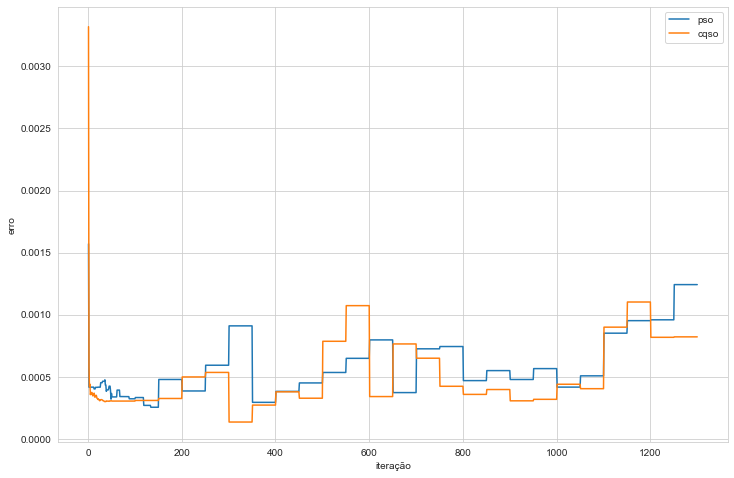

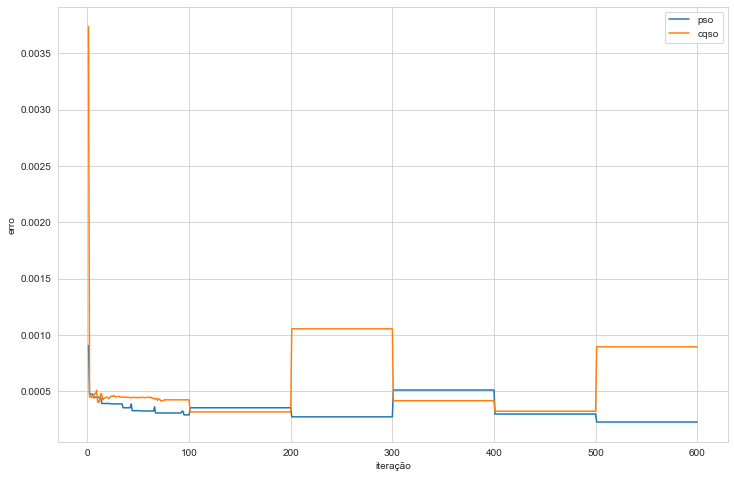

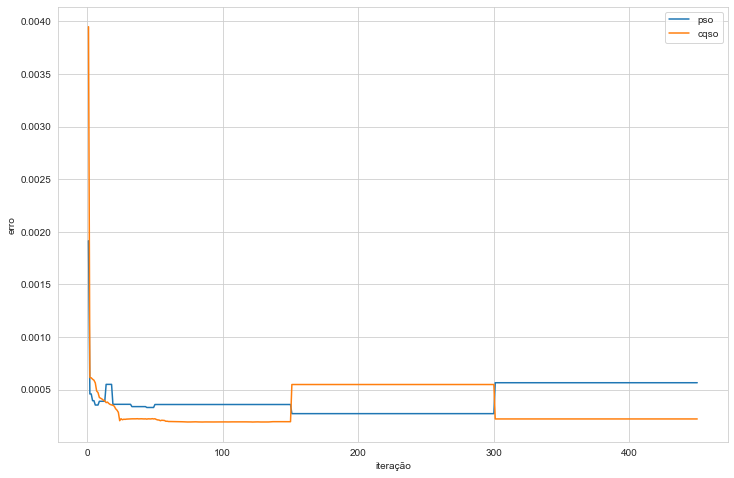

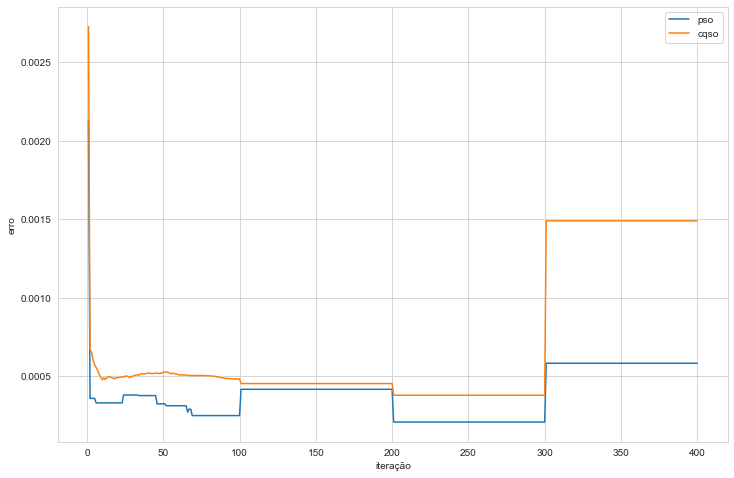

In [191]:
# Teste AWS
print("Teste AWS")
plota_graf(aws_teste_media_1, 'aws_teste_media_1')
plota_graf(aws_teste_media_2, 'aws_teste_media_2')
plota_graf(aws_teste_media_3, 'aws_teste_media_3')
plota_graf(aws_teste_media_4, 'aws_teste_media_4')

Treinamento USD


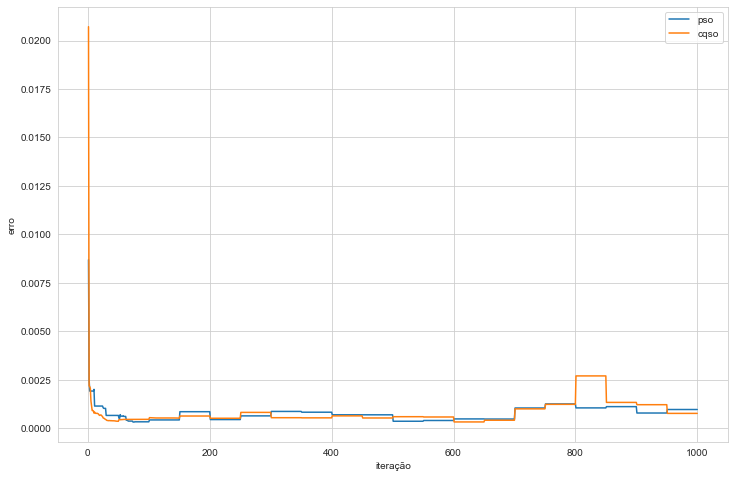

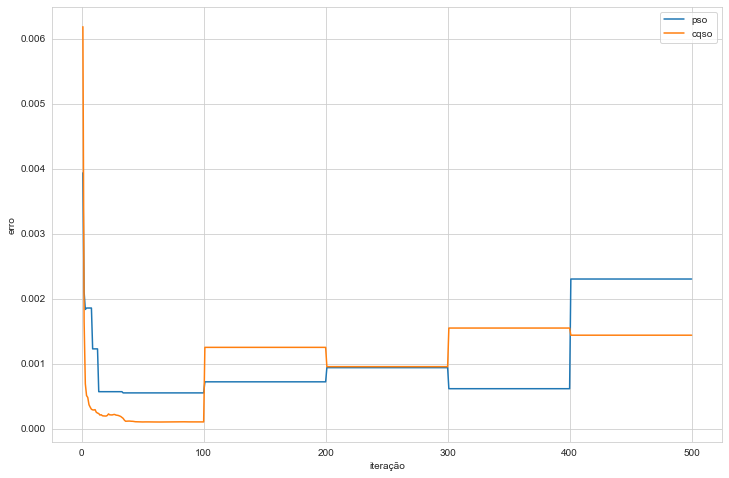

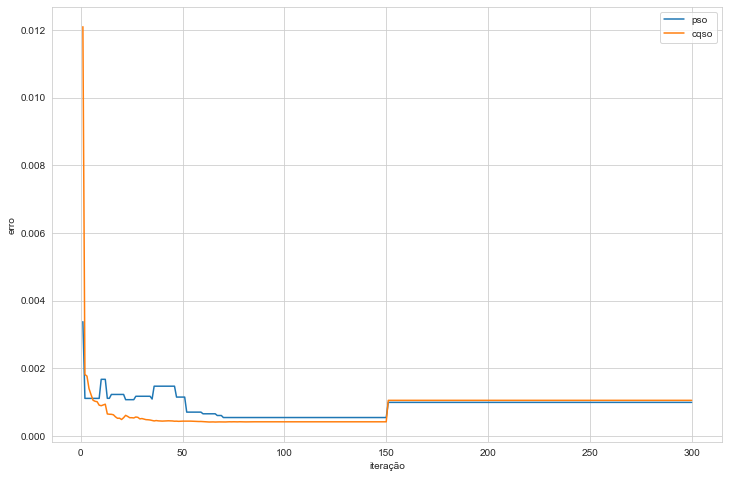

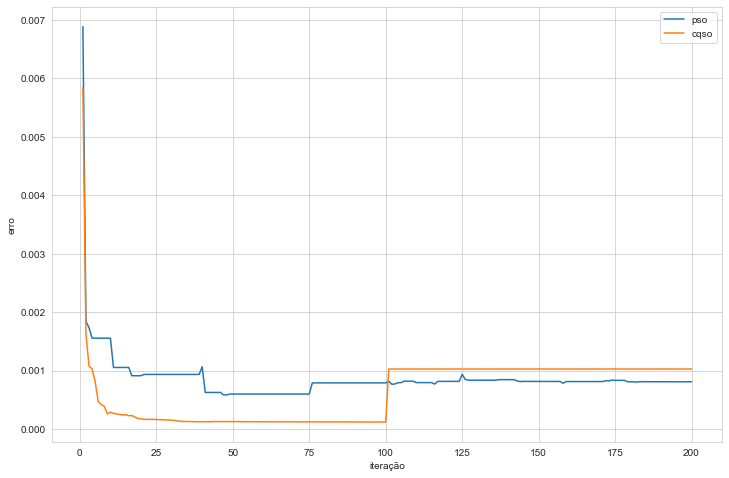

In [195]:
# Treinamento USD
print("Treinamento USD")
plota_graf(usd_treino_media_1, 'aws_treino_media_1')
plota_graf(usd_treino_media_2, 'aws_treino_media_2')
plota_graf(usd_treino_media_3, 'aws_treino_media_3')
plota_graf(usd_treino_media_4, 'aws_treino_media_4')

Teste USD


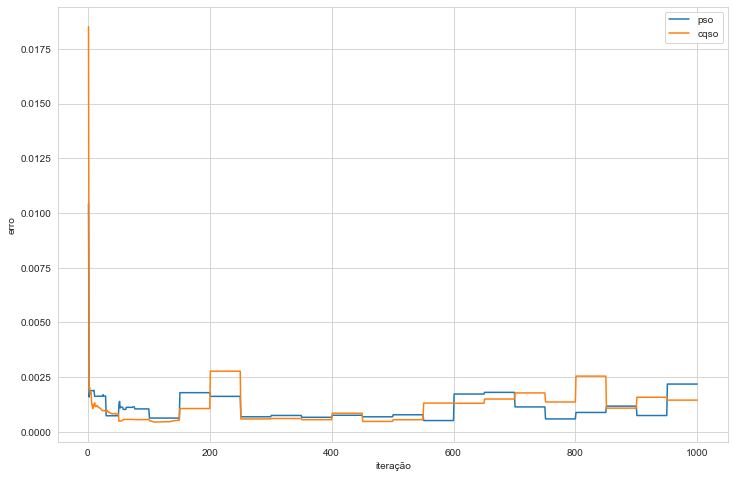

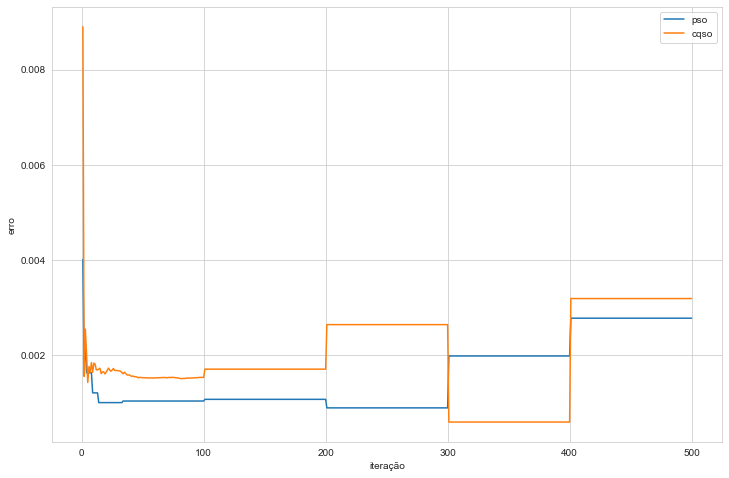

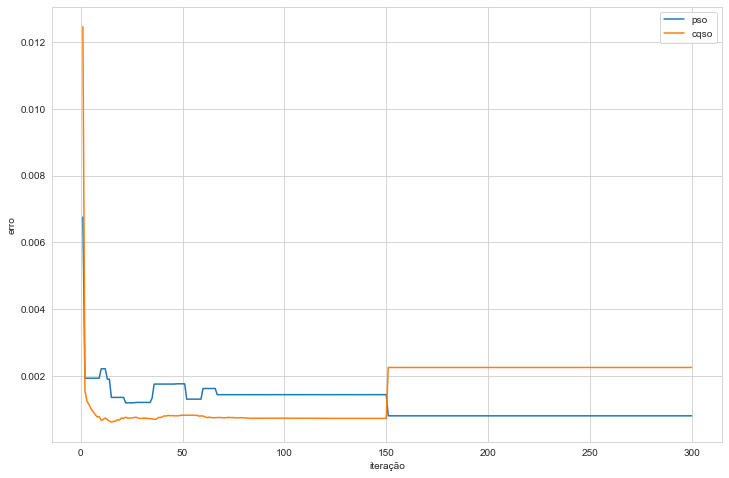

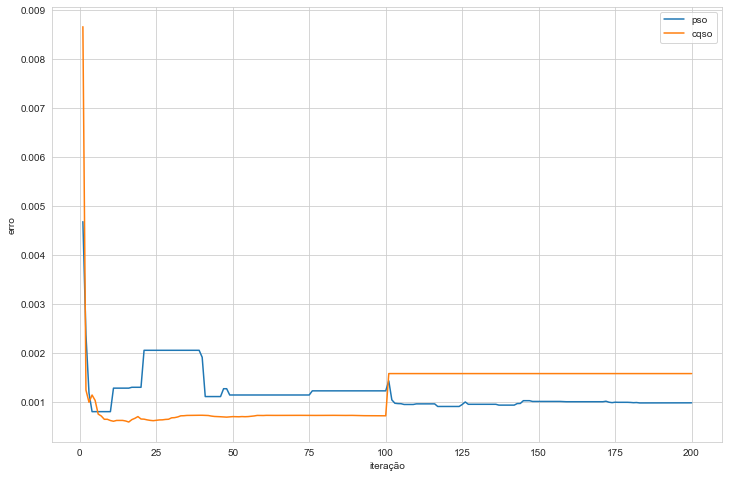

In [196]:
# Teste USD
print("Teste USD")
plota_graf(usd_teste_media_1, 'aws_teste_media_1')
plota_graf(usd_teste_media_2, 'aws_teste_media_2')
plota_graf(usd_teste_media_3, 'aws_teste_media_3')
plota_graf(usd_teste_media_4, 'aws_teste_media_4')